In [22]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
cityData = "data/city_data.csv"
rideData = "data/ride_data.csv"

# Read the City and Ride Data
cityData_df = pd.read_csv("data/city_data.csv")
rideData_df = pd.read_csv("data/ride_data.csv")
# Combine the data into a single dataset

df = pd.merge(cityData_df, rideData_df, on='city')
df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [25]:
# reorganize dataframe into Key variables : Average Fare ($), Total Number of Rides & Total Number of Drivers Per City
df_groupby = df.groupby(by = ["city","type"]).agg({"fare" : "mean", "ride_id": "count", "driver_count": "mean"}).reset_index()

In [24]:
df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [157]:
# Obtain the x and y coordinates for each of the three city types
x_urban = df_groupby[df_groupby["type"]== "Urban"]["ride_id"]
y_urban = df_groupby[df_groupby["type"]== "Urban"]["fare"]
s_urban = df_groupby[df_groupby["type"]== "Urban"]["driver_count"] *10

x_suburban = df_groupby[df_groupby["type"]== "Suburban"]["ride_id"]
y_suburban = df_groupby[df_groupby["type"]== "Suburban"]["fare"]
s_suburban = df_groupby[df_groupby["type"]== "Suburban"]["driver_count"]*10

x_rural = df_groupby[df_groupby["type"]== "Rural"]["ride_id"]
y_rural = df_groupby[df_groupby["type"]== "Rural"]["fare"]
s_rural = df_groupby[df_groupby["type"]== "Rural"]["driver_count"]*10

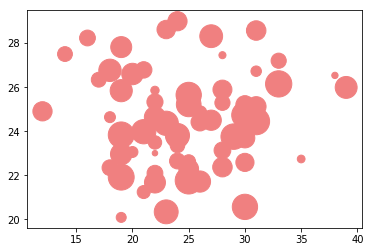

In [158]:
plt.scatter(x_urban, y_urban, s_urban, color="lightcoral")

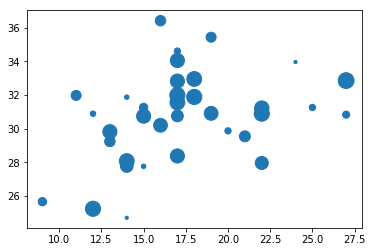

In [159]:
plt.scatter(x_suburban, y_suburban, s_suburban)

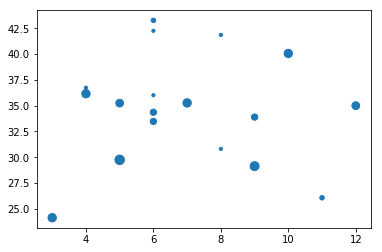

In [160]:
plt.scatter(x_rural, y_rural, s_rural)

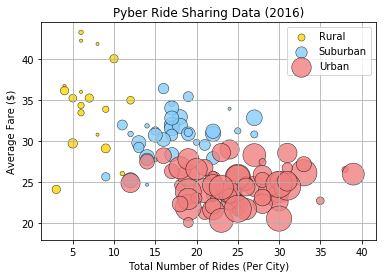

In [189]:
fig = plt.figure()
fig.add_axes()

ax1 = fig.add_subplot(111)

ax1.scatter(x_rural, y_rural, s_rural, color="gold",label ="Rural",alpha= .8, edgecolor="black", linewidths=.5)
ax1.scatter(x_suburban, y_suburban, s_suburban,color="lightskyblue",label="Suburban", alpha= .8, edgecolor="black", linewidths=.5)
ax1.scatter(x_urban, y_urban, s_urban, "lightcoral", label="Urban", alpha= .8, edgecolor="black", linewidths=.5)

#set title, x and y axis titles
ax1.set_xlabel("Total Number of Rides (Per City)")
ax1.set_ylabel("Average Fare ($)")
ax1.set_title("Pyber Ride Sharing Data (2016)")

#create note:
fig.text=(50,30,'Note:Circle size correlates with driver count per city')
fig.text

#create legend + add grid
ax1.legend()
ax1.grid()

fig.savefig('Pyber_rideBubbles.png', dpi=300)



## Total Fares by City Type

In [40]:
# Calculate Type Percents by city
df_fares = df.groupby(by= ["type"]).agg({"fare":"count"}).reset_index()
df_fares

,type,fare
0,Rural,125
1,Suburban,625
2,Urban,1625


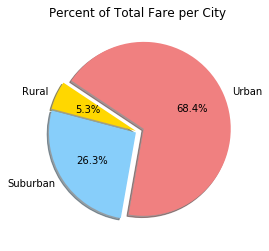

In [190]:
# Build Pie Chart
fares = ["Urban", "Rural", "Suburban"]
sizes = [1625,125,625]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (.08, .02, .02)

plt.title('Percent of Total Fare per City')
plt.pie(sizes,explode=explode, labels=fares, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=-100)
plt.show()

fig.savefig("PercentFare", dpi=300)

## Total Rides by City Type

In [119]:
# Calculate Ride Percents
df_totalRides= df.groupby(by=["type"]).agg({"ride_id": "count"}).reset_index()
df_totalRides

,type,ride_id
0,Rural,125
1,Suburban,625
2,Urban,1625


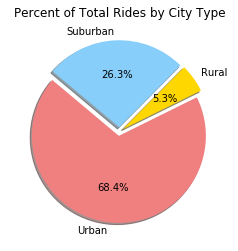

In [191]:
# Build Pie Chart
rides = ["Urban", "Rural", "Suburban"]
sizes = [1625,125,625]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (.05, .05, .05)

plt.title('Percent of Total Rides by City Type')
plt.pie(sizes,explode=explode, labels=fares, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=500)
plt.show()

fig.savefig("PercentRides", dpi=300)


## Total Drivers by City Type

In [74]:
#calculate total driver by city type
df_totalDrivers = df.groupby(by=["type"]).agg({"driver_count":"sum"})
df_totalDrivers

,driver_count
type,
Rural,537
Suburban,8570
Urban,59602


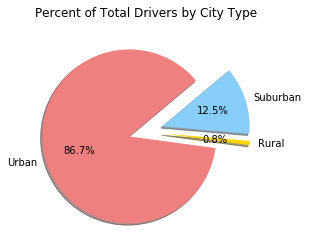

In [192]:
# Build Pie Charts
drivers = ["Urban", "Rural", "Suburban"]
sizes = [59602,537,8570]
colors = ["lightcoral", "gold", "lightskyblue"]
explode = (.2,.2,.2)

plt.title('Percent of Total Drivers by City Type')
plt.pie(sizes,explode=explode, labels=fares, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=400)
plt.show()

fig.savefig("TotalDrivers", dpi=300)
